<a href="https://colab.research.google.com/github/dsibi/yandex_praktikum_da/blob/main/analytics_in_airlines/analytics_in_airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Аналитика в авиакомпании**

---

## Описание проекта

Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

##Описание данных

Данные состоят из 2 таблиц:
*  таблица 1 - количество рейсов с вылетом в сентябре 2018 года на каждой модели самолёта;
*  таблица 2 - среднее количество прибывающих рейсов в день для каждого города за август 2018 года.

Описание данных таблицы 1:
*  model — модель самолета;
*  flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года.

Описание данных таблицы 2:
*  city — наименование города;
*  average_flights — среднее количество рейсов, прибывающих в город за 1 день в августе 2018 года.

##Шаг 1. Откроем файлы с данными и изучим общую информацию

---



Импортируем все необходимые нам библиотеки, далее новые библиотеки будем добавлять сюда же

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

Запуск импорта данных с Google Drive (при работе через Google Collabs)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Чтение файлов

In [ ]:
air=pd.read_csv('/content/drive/My Drive/Edu/Data Analysis/6_Сбор и хранение данных/!Project/data/query_1.csv')
city=pd.read_csv('/content/drive/My Drive/Edu/Data Analysis/6_Сбор и хранение данных/!Project/data/query_3.csv')

Изучим общую информацию 

In [ ]:
df_list = [air, city]
for df in df_list:
  display(df.head())
  df.info()
  display(df.isna().sum())
  display(df.describe())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


model             0
flights_amount    0
dtype: int64

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


city               0
average_flights    0
dtype: int64

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


1. Названия колонок: корректировка  не требуется.
2. Типы данных: в целях оптимизации работы с памятью необходимо скорректировать типы данных в колонках:
*  flights_amount  - с int64 на int16;
*  average_flights - с float64 на float16.
3. Пропуски отсутствуют.

##Шаг 2. Подготовим данные

---

###Произведем изменение типа данных 

*  flights_amount  - с int64 на int16

In [ ]:
air.memory_usage(deep=True).sum()

775

In [ ]:
air['flights_amount']=air['flights_amount'].astype(np.int16)
air.memory_usage(deep=True).sum()

727

*  average_flights - с float64 на float16

In [ ]:
city.memory_usage(deep=True).sum()

10922

In [ ]:
city['average_flights']=city['average_flights'].astype(np.float16)
city.memory_usage(deep=True).sum()

10316

##Шаг 3. Проведем исследовательский анализ данных

---



###3.1. Выберем топ-10 городов по количеству рейсов

In [ ]:
city_top_10=city.sort_values(by='average_flights', ascending=False).iloc[0:10,0:10]
city_top_10

,city,average_flights
43,Москва,129.750000
70,Санкт-Петербург,31.156250
54,Новосибирск,17.328125
33,Красноярск,11.578125
20,Екатеринбург,11.320312
67,Ростов-на-Дону,10.195312
63,Пермь,10.132812
10,Брянск,10.000000
74,Сочи,9.609375
84,Ульяновск,9.578125


###3.2. Построим графики

####3.2.1. Модели самолетов и количество рейсов

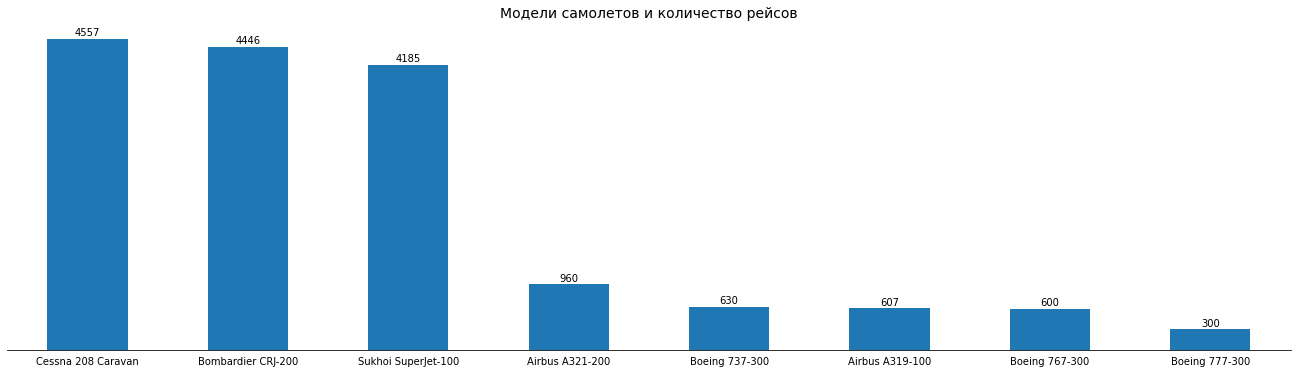

In [ ]:
ax=air.sort_values(by='flights_amount', ascending=False).plot(x='model', y='flights_amount', kind='bar', figsize=(23, 6), rot=360)
ax.get_legend().remove()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_visible(False)
plt.tick_params(bottom=False)
plt.xlabel(' ').set_visible(False)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 50,
            '{:.0f}'.format(height),
            fontsize=10,
            ha="center")
plt.title('Модели самолетов и количество рейсов', size=14)
plt.show()

Топ-3 модели самолёта в сентябре 2018 года по количеству полетов - Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100.

####3.2.2. Города и количество рейсов

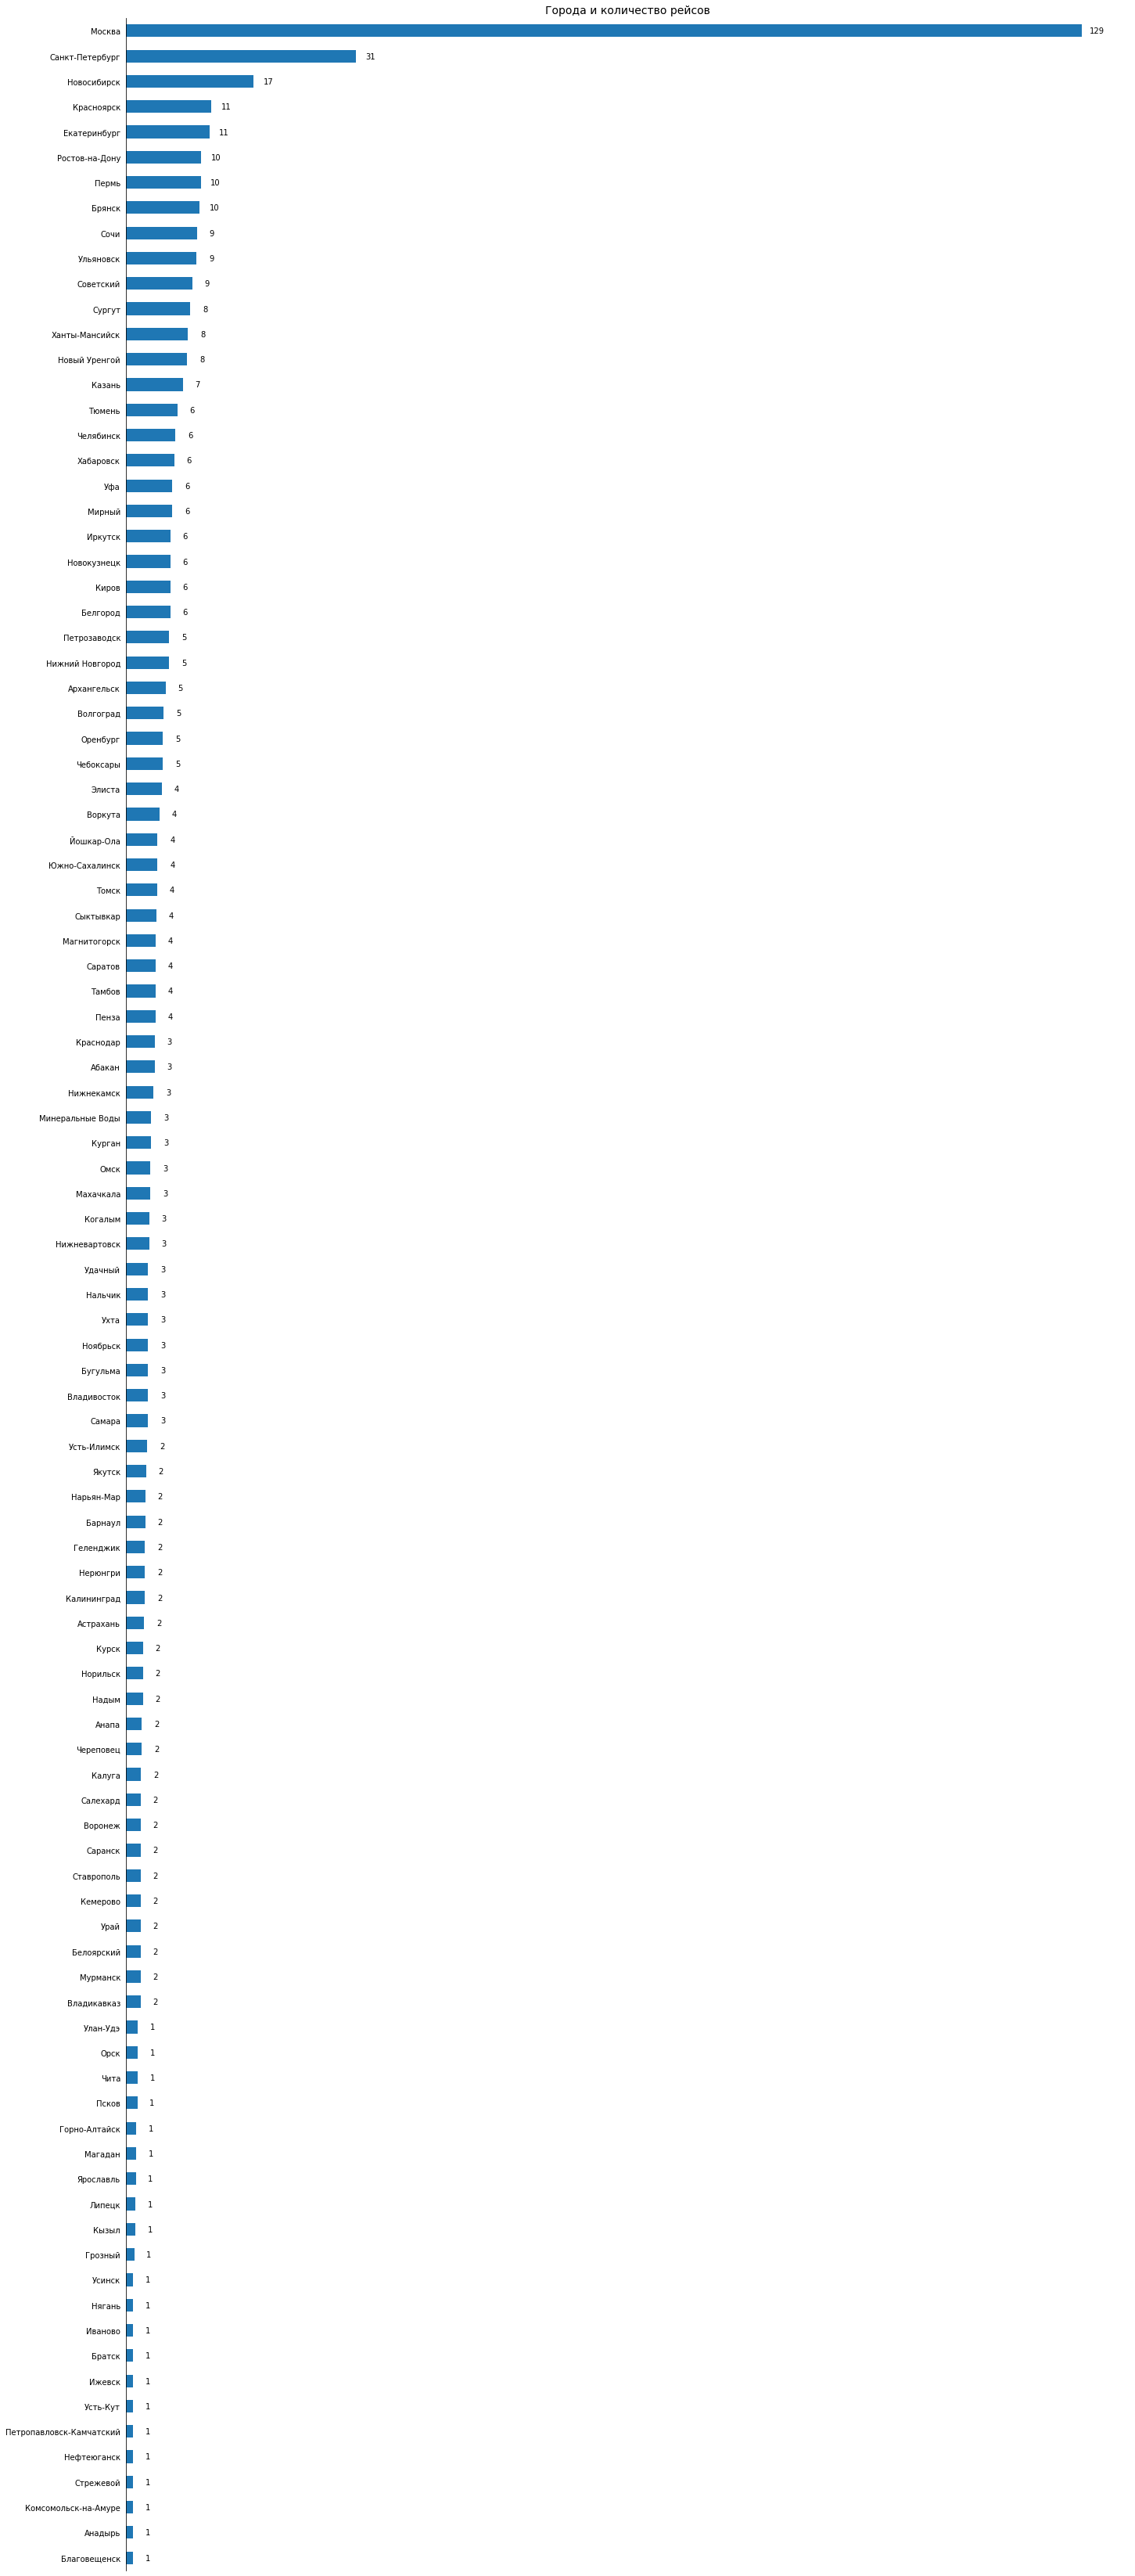

In [ ]:
ax=city.sort_values(by='average_flights', ascending=True).plot(x='city', y='average_flights', kind='barh', figsize=(23, 60), rot=360)
ax.get_legend().remove()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tick_params(left=False)
plt.ylabel(' ').set_visible(False)
ax.get_xaxis().set_visible(False)
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width()+2, p.get_y()+0.5*p.get_height(),
              '%d' % int(width),
              ha='center', va='center')
plt.title('Города и количество рейсов', size=14)
plt.xlabel(' ').set_visible(False)
plt.show()

Максимальное количество рейсов в августе 2018 года было осуществлено в Москву, Санкт-Петербург и Новосибирск.

####3.2.3. Топ-10 городов и количество рейсов

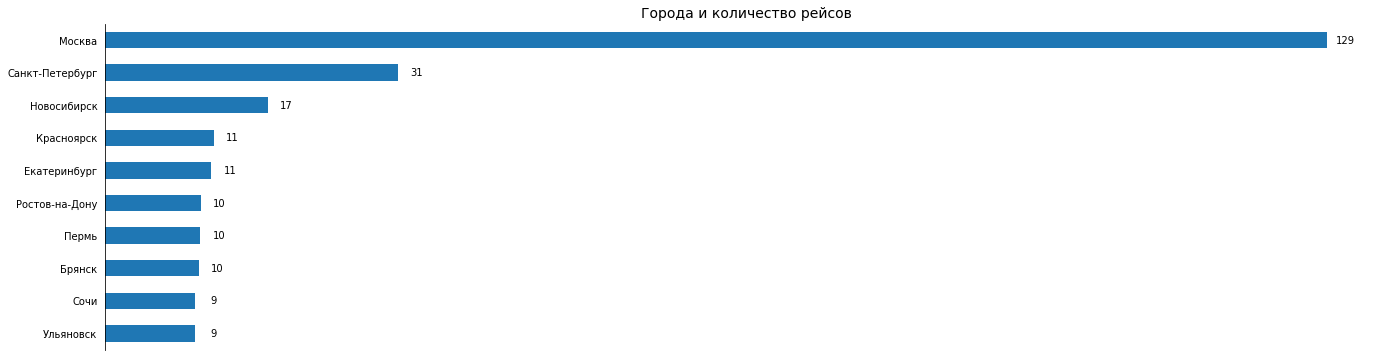

In [ ]:
ax=city_top_10.sort_values(by='average_flights', ascending=True).plot(x='city', y='average_flights', kind='barh', figsize=(23, 6), rot=360)
ax.get_legend().remove()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tick_params(left=False)
plt.ylabel(' ').set_visible(False)
ax.get_xaxis().set_visible(False)
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width()+2, p.get_y()+0.5*p.get_height(),
              '%d' % int(width),
              ha='center', va='center')
plt.title('Города и количество рейсов', size=14)
plt.xlabel(' ').set_visible(False)
plt.show()

В топ-10 городов первую строчку занимает Москва, далее идет с отрывом более чем в 4 раза - Санкт-Петербург, в Новосибирск почти в 2 раза меньше рейсов чем в Санкт-Петербург.

##Шаг 4. Общий вывод
---



При работе с проектом были выполнениы следующие шаги:
1. Открыт файл с данными и изучена общая информация
2. Произведено изменение типа данных
3. Проведен исследовательский анализ данных:
* модели самолетов и количество рейсов;
* города и количество рейсов;
* топ-10 городов и количество рейсов.

####Резюме


---


Топ-3 модели самолёта в сентябре 2018 года по количеству полетов - Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100.

В топ-10 городов первую строчку занимает Москва, далее идет с отрывом более чем в 4 раза - Санкт-Петербург, в Новосибирск почти в 2 раза меньше рейсов чем в Санкт-Петербург.

Исходя из имеющихся данных сделать вывод о зависимости изменения спроса пассажиров на рейсы в города, где проходят крупнейшие фестивали не представляется возможным, т.к. необходим больший массив анализируемых данных.